In [1]:
import os, sys
import general_config 
print(general_config.ROOTDIR)
sys.path.append(general_config.ROOTDIR)

import numpy as np
import matplotlib.pyplot as plt
from pipeline.objgen.random_simple_gen_implemented import TenClassesRandomFetcher, TenClassesPyIO

D:/Desktop@D/xai_basic


In [2]:
DEBUG_TOGGLE = {
    'test10classes': 1,
    'test10pytorch': 1,
}

In [3]:
def create_multi_axes_figures(settings, figsize=(12,12)):
    fig = plt.figure(figsize=figsize)
    for axpos, img, title, is_heatmap in settings:
        if not is_heatmap:
            vmin, vmax = 0.,1.
            cmap=None
        else:
            vmin, vmax = -1.,1.
            cmap = 'bwr'
        fig.add_subplot(*axpos)
        plt.gca()
        cax = plt.gca().imshow(img, vmin=vmin, vmax=vmax, cmap=cmap)
        if title is not None:
            plt.gca().set_title(title)
        
        plt.gca().set_xlim(0,512)
        plt.gca().set_ylim(0,512)
        if is_heatmap:
            plt.colorbar(cax,fraction=0.04)
    plt.tight_layout()

In [4]:
ran = TenClassesRandomFetcher()
ran.setup0001(general_meta_setting=None, explanation_setting=None)
print(ran.explanation_setting)
cobj, cimg, heatmap, variables = ran.uniform_random_draw()
print('cimg.shape:',cimg.shape)

{'localization_threshold': 0.05, 'localization_value': 0.4, 'discriminative_feature_threshold': 0.05, 'discriminative_feature_value': 0.9}
cimg.shape: (512, 512, 3)


{0.0, 0.9, 0.4}
{0.0, 0.4, 0.9}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.4, 0.9}
{0.0}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.4, 0.9}
{0.0, 0.9, 0.4}
{0.0, 0.4, 0.9}
{0.0, 0.9, 0.4}
{0.0, 0.4, 0.9}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}


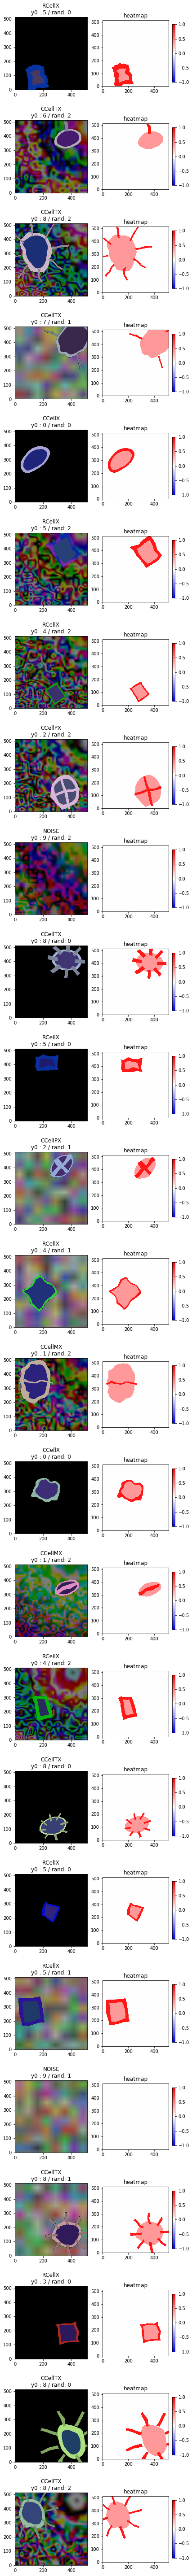

In [5]:
if DEBUG_TOGGLE['test10classes']:
    N = 25
    fig_settings = []
    fig_layout = (N,2)
    for i in range(1,N+1):
        cobj, cimg, heatmap, variables = ran.uniform_random_draw()
        print(set(list(heatmap.reshape(-1))))
        fig_settings.append((fig_layout+(2*i-1,), cimg, '%s\ny0 : %s / rand: %s'%(str(variables['type']),
            str(variables['y0']),str(variables['bg_rand'])), False))
        fig_settings.append((fig_layout+(2*i,), heatmap, 'heatmap', True))

    create_multi_axes_figures(fig_settings, figsize=(6,np.max((16*int(N/5),5))))

In [6]:
from torch.utils.data import DataLoader
if DEBUG_TOGGLE['test10pytorch']:
    n_epoch = 1
    data_per_epoch = 12
    batch_size = 4

    this_dataset = TenClassesPyIO()
    this_dataset.setup_training_0001(general_meta_setting=None, explanation_setting=None, data_size=12)

    for epoch in range(n_epoch):
        trainloader = DataLoader(dataset=this_dataset, shuffle=True, batch_size=batch_size)
        print('epoch: %s'%(str(epoch)))
        for i, data in enumerate(trainloader, 0):
            x, y0 = data
            print('  x.shape:',x.clone().detach().numpy().shape, 'y0', y0.clone().detach().numpy())

  data prepared.                                                
epoch: 0
  x.shape: (4, 3, 512, 512) y0 [3 4 4 6]
  x.shape: (4, 3, 512, 512) y0 [7 5 4 5]
  x.shape: (4, 3, 512, 512) y0 [0 7 9 5]
